<a href="https://colab.research.google.com/github/talgalper/Honours-2021/blob/main/plot_ratio_sequenced_vs_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [19]:
data = pd.read_csv("/content/drive/MyDrive/Honours/owid-covid-data.csv")

In [20]:
# data check
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [21]:
# data check
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.169320e+05,116928.000000,115914.000000,1.060730e+05,106226.000000,115914.000000,116317.000000,116313.000000,115304.000000,105471.000000,105624.000000,115304.000000,99243.000000,14483.000000,14483.000000,16531.000000,16531.000000,1269.000000,1269.000000,2092.000000,2092.000000,5.273500e+04,5.283700e+04,52837.000000,52735.000000,6.345300e+04,63453.000000,59569.000000,58929.000000,2.886100e+04,2.743400e+04,2.430500e+04,3.260000e+03,2.394100e+04,5.173400e+04,28861.000000,27434.000000,24305.000000,3260.000000,51734.000000,103150.000000,1.226500e+05,114109.000000,108917.000000,107709.000000,108321.000000,109565.000000,73357.000000,109193.000000,112626.000000,85093.000000,83859.000000,54958.000000,99276.000000,117165.000000,109288.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,1.470300e+06,6452.636948,6476.814426,3.707611e+04,144.506957,131.882037,18230.234932,83.967166,84.109102,379.408266,1.576135,1.433422,1.003105,912.241248,21.897718,4104.570685,145.371623,211.642690,16.511775,2971.458173,81.212132,5.546718e+04,1.093398e+07,460.878401,2.455921,5.178507e+04,2.341445,0.087534,160.819663,7.132290e+07,3.833610e+07,2.496027e+07,1.425513e+06,8.112632e+05,3.879725e+05,45.800904,27.202268,20.779582,1.994012,3489.426779,56.839953,1.220604e+08,396.002043,30.509194,8.750761,5.536843,19241.374872,13.491326,259.815315,8.018959,10.591566,32.740469,50.894977,3.031072,73.257146,0.726403,29670.238880,8.217576,15.467974,722.712373
std,9.825314e+06,39254.560721,38869.571683,2.208232e+05,787.959960,738.126037,30837.888836,195.551481,164.558111,637.916905,4.165206,3.094389,0.344792,2882.423355,24.889214,11675.612502,193.403764,493.723887,31.086329,10443.849624,137.587478,1.935414e+05,4.593416e+07,1125.273210,6.544489,1.741379e+05,5.604952,0.097074,852.374507,4.023351e+08,2.235303e+08,1.516149e+08,4.006155e+06,3.772966e+06,2.548360e+06,46.507301,24.832165,22.145149,5.611316,4300.808725,20.657330,6.754316e+08,1846.498929,9.116983,6.187591,4.219848,20042.901957,19.987674,119.798451,4.280720,10.504595,13.507376,31.826175,2.457395,7.536073,0.150082,84213.582725,15.762591,31.208875,1111.400639
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-4736.562000,-375.643000,0.001000,-143.838000,-18.968000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3195

In [22]:
data.date = pd.to_datetime(data.date)

In [23]:
# data check
data.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
123516   2021-10-09
123517   2021-10-10
123518   2021-10-11
123519   2021-10-12
123520   2021-10-13
Name: date, Length: 123521, dtype: datetime64[ns]

In [24]:
data.location = data.location.astype('category')
data.continent = data.continent.astype('category')

In [25]:
# data check
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123516,ZWE,Africa,Zimbabwe,2021-10-09,131762.0,57.0,95.429,4636.0,2.0,1.571,8730.487,3.777,6.323,307.179,0.133,0.104,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5572318.0,3168552.0,2403766.0,NaN,15812.0,23331.0,36.92,20.99,15.93,NaN,1546.0,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
123517,ZWE,Africa,Zimbabwe,2021-10-10,131796.0,34.0,95.286,4637.0,1.0,1.429,8732.740,2.253,6.314,307.245,0.066,0.095,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5581524.0,3171399.0,2410125.0,NaN,9206.0,22396.0,36.98,21.01,15.97,NaN,1484.0,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
123518,ZWE,Africa,Zimbabwe,2021-10-11,131875.0,79.0,106.571,4643

In [26]:
subset_data = data[["continent", "location", "date", "new_cases"]]
subset_data = subset_data[subset_data.location == "World"]
subset_data = subset_data.dropna(subset=["new_cases"])
subset_data.new_cases = subset_data.new_cases.astype('int64')
subset_data.index = subset_data.date

In [27]:
# data check
subset_data

,continent,location,date,new_cases
date,,,,
2020-01-22,NaN,World,2020-01-22,0
2020-01-23,NaN,World,2020-01-23,98
2020-01-24,NaN,World,2020-01-24,286
2020-01-25,NaN,World,2020-01-25,493
2020-01-26,NaN,World,2020-01-26,684
...,...,...,...,...
2021-10-09,NaN,World,2021-10-09,329269
2021-10-10,NaN,World,2021-10-10,300669
2021-10-11,NaN,World,2021-10-11,393375


In [28]:
sum_months = subset_data.groupby(pd.Grouper(freq='M')).sum()
sum_months = sum_months.reset_index()
sum_months

,date,new_cases
0,2020-01-31,9370
1,2020-02-29,76095
2,2020-03-31,790234
3,2020-04-30,2405448
4,2020-05-31,2907302
5,2020-06-30,4269812
6,2020-07-31,7145341
7,2020-08-31,7903169
8,2020-09-30,8503944
9,2020-10-31,12133650


In [29]:
gisaid_data = pd.read_excel('/content/drive/MyDrive/Honours/gisaid_monthly_submissions_global_2021-09-08-2141.xlsx')
gisaid_data.drop('country_total', axis=1, inplace=True)
gisaid_data.drop(188, inplace=True)
gisaid_data

,Unnamed: 0,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020,09/2020,10/2020,11/2020,12/2020,01/2021,02/2021,03/2021,04/2021,05/2021,06/2021,07/2021,08/2021,09/2021
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,1,0,29,0,0,0,12,0,0
2,Algeria,0,0,2,1,0,0,0,0,0,0,0,0,15,4,7,0,0,0,0,23,3
3,Andorra,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,0
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,118,0,533,62,63,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Uzbekistan,0,0,0,0,2,0,0,0,0,0,0,0,0,0,6,20,0,0,6,56,0
184,Venezuela,0,0,0,0,0,3,0,0,9,0,0,0,0,0,0,101,15,20,0,22,1
185,Vietnam,0,1,7,0,20,25,26,8,0,0,27,0,28,9,6,0,1,87,41,75,0
186,Zambia,0,0,0,0,0,0,1,0,0,0,0,0,1,219,0,0,0,38,433,0,0


In [30]:
gisaid_data = gisaid_data.melt(id_vars=('Unnamed: 0'))

In [31]:
gisaid_data.columns = ['Country', 'Month', 'Sequenced']

In [32]:
gisaid_data.Month = pd.to_datetime(gisaid_data.Month)

In [33]:
# data check
gisaid_data

,Country,Month,Sequenced
0,Afghanistan,2020-01-01,0
1,Albania,2020-01-01,0
2,Algeria,2020-01-01,0
3,Andorra,2020-01-01,0
4,Angola,2020-01-01,0
...,...,...,...
3943,Uzbekistan,2021-09-01,0
3944,Venezuela,2021-09-01,1
3945,Vietnam,2021-09-01,0
3946,Zambia,2021-09-01,0


In [34]:
gisaid_data.index = gisaid_data.Month
sum_months_gisaid = gisaid_data.groupby(pd.Grouper(freq='M')).sum()
sum_months_gisaid = sum_months_gisaid.reset_index()
sum_months_gisaid

,Month,Sequenced
0,2020-01-31,67
1,2020-02-29,185
2,2020-03-31,2941
3,2020-04-30,12482
4,2020-05-31,20058
5,2020-06-30,21795
6,2020-07-31,18315
7,2020-08-31,17444
8,2020-09-30,38602
9,2020-10-31,39107


In [35]:
merged_months = sum_months.merge(sum_months_gisaid, how='outer', left_on='date', right_on='Month')
merged_months['percent_sequenced'] =  merged_months.Sequenced / merged_months.new_cases * 100
merged_months

,date,new_cases,Month,Sequenced,percent_sequenced
0,2020-01-31,9370,2020-01-31,67.0,0.715048
1,2020-02-29,76095,2020-02-29,185.0,0.243117
2,2020-03-31,790234,2020-03-31,2941.0,0.372168
3,2020-04-30,2405448,2020-04-30,12482.0,0.518905
4,2020-05-31,2907302,2020-05-31,20058.0,0.689918
5,2020-06-30,4269812,2020-06-30,21795.0,0.510444
6,2020-07-31,7145341,2020-07-31,18315.0,0.256321
7,2020-08-31,7903169,2020-08-31,17444.0,0.220722
8,2020-09-30,8503944,2020-09-30,38602.0,0.453931
9,2020-10-31,12133650,2020-10-31,39107.0,0.322302


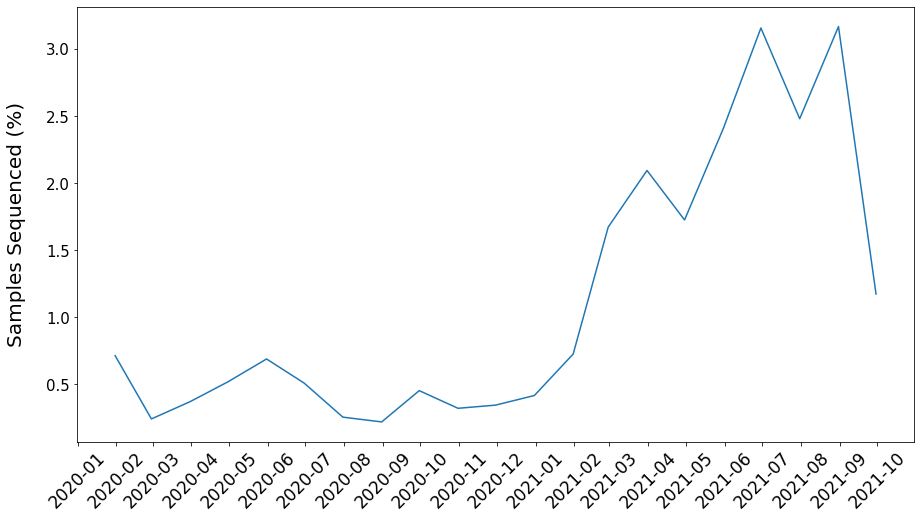

In [36]:
fig, ax = plt.subplots()

plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=15)
fig.set_size_inches(15, 8)
ax.plot(merged_months.date, merged_months.percent_sequenced)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax.set_ylabel("Samples Sequenced (%)", labelpad=20, fontsize=20)

fig.show()

In [37]:
fig.savefig('Ratio_genomes_sequenced_vs_cases')

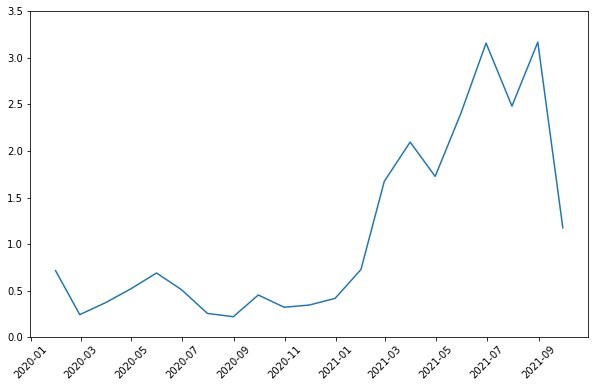

In [38]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(merged_months.date, merged_months.percent_sequenced)

plt.xticks(rotation = 45)
plt.ylim((0, 3.5))
#plt.xlim([pd.to_datetime('2020-01-31'), pd.to_datetime('2021-07-31')])

# show all xticks
# save as png
# label y axis

plt.show()


In [ ]:
# An example of how we would use the 'monthly total' row instead of summing up all countries.
gisaid_data = pd.read_excel('gisaid_monthly_submissions_global_2021-07-16-0358.xlsx')
gisaid_data.drop('country_total', axis=1, inplace=True)
gisaid_data = gisaid_data[gisaid_data['Unnamed: 0'] == 'monthly total:']
gisaid_data.melt('Unnamed: 0').drop('Unnamed: 0', axis=1)